In [1]:
import pandas as pd
import openrouteservice as ors
import folium
from PIL import Image
import numpy as np

import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt
from citibikeAPI import *
from utils import *

# dont need the below if we use local instance of ORS
# client = ors.Client(key='5b3ce3597851110001cf62487d33115ea15e483bb81a0b4cfcc899cb')

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Connect to locally hosted API

In [2]:
#get station status
url = 'http://localhost:8080/ors/v2/directions/driving-car?&start=-73.98854,40.659053&end=-73.94111,40.6851532'
with urllib.request.urlopen(url) as url:
	station_status_data = json.load(url)

locations=[list(reversed(coord)) 
                           for coord in 
                           station_status_data['features'][0]['geometry']['coordinates']]

In [4]:
station_data = getAllStationData()
station_data.to_csv('stations.csv')

In [5]:
station_data

,name,lat,lon,capacity,legacy_id,geoID,num_docks_available,num_bikes_disabled,num_ebikes_available,num_bikes_available,num_docks_disabled,station_status,is_renting,is_returning,last_reported,is_installed
station_id,,,,,,,,,,,,,,,,
66dd515d-0aca-11e7-82f6-3863bb44ef7c,W 74 St & Columbus Ave,40.778567,-73.977550,27,3172,-33.198983,0,0,0,0,0,out_of_service,0,0,1682684051,0
66dc3e89-0aca-11e7-82f6-3863bb44ef7c,E 31 St & 3 Ave,40.743943,-73.979661,65,476,-33.235718,0,0,0,0,0,out_of_service,0,0,1682941737,0
66dd01c5-0aca-11e7-82f6-3863bb44ef7c,Berry St & N 8 St,40.719009,-73.958525,27,3092,-33.239516,6,2,0,18,0,active,1,1,1682969502,1
c638ec67-9ac0-416f-944f-619926144931,E 40 St & Park Ave,40.750756,-73.978326,87,4675,-33.227570,55,3,10,30,0,active,1,1,1682969503,1
1786698321265653818,S 4 St & Roebling St,40.710709,-73.959724,41,1786698321265653818,-33.249015,34,1,0,6,0,active,1,1,1682969508,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46813ecf-8df4-4c8f-9579-0179e0b36ba6,Marshall St & 2 St,40.740802,-74.042521,18,4673,-33.301719,15,1,2,2,0,active,1,1,1682969481,1
5aa81a37-ea1d-4bf6-ab40-4751c6b4fb08,Fairmount Ave,40.725726,-74.071959,18,3678,-33.346233,18,0,0,0,0,active,1,1,1682969484,1
66ddddb4-0aca-11e7-82f6-3863bb44ef7c,Monmouth and 6th,40.725685,-74.048790,14,3278,-33.323105,14,0,0,0,0,active,1,1,1682969485,1


In [6]:
trip_data = '../../raw/202303-citibike-tripdata.csv'
networked_stations = getTopTenConnections(trip_data)
networked_stations

{'Skillman Ave & 54 St': end_station_name
 46 St & Queens Blvd             13
 57 St & 43 Ave                  12
 48 St & Skillman Ave            12
 43 St & Skillman Ave             9
 Greenpoint Ave & 47 St           8
 61 St & 39 Ave                   7
 Woodside Ave & Roosevelt Ave     7
 31 Ave & 34 St                   6
 53 St & Roosevelt Ave            5
 62 St & Northern Blvd            5
 Name: count, dtype: int64,
 'Driggs Ave & Lorimer St': end_station_name
 Driggs Ave & N 9 St               95
 Driggs Ave & N Henry St           58
 Metropolitan Ave & Bedford Ave    45
 N 6 St & Bedford Ave              35
 Wythe Ave & Metropolitan Ave      30
 Roebling St & N 4 St              27
 Kent Ave & N 7 St                 25
 Graham Ave & Conselyea St         24
 Greenpoint Ave & Manhattan Ave    22
 Graham Ave & Withers St           19
 Name: count, dtype: int64,
 'Herkimer St & Eastern Pkwy': end_station_name
 Brooklyn Ave & Prospect Pl          9
 Fulton St & Saratoga Ave     

In [13]:
routes = getRouteBetweenStations(networked_stations, station_data)

In [14]:
(routes)

{'Skillman Ave & 54 St-46 St & Queens Blvd': {'points': [[40.745534,
    -73.909872],
   [40.745559, -73.909962],
   [40.745668, -73.910368],
   [40.744743, -73.910564],
   [40.744471, -73.911509],
   [40.744166, -73.912484],
   [40.744047, -73.912889],
   [40.743772, -73.913835],
   [40.743628, -73.914286],
   [40.743538, -73.914573],
   [40.743455, -73.914837],
   [40.743142, -73.915854],
   [40.743042, -73.916215],
   [40.743099, -73.916805],
   [40.743206, -73.91773],
   [40.743315, -73.91867],
   [40.74342, -73.919588],
   [40.743803, -73.919513],
   [40.745029, -73.919274],
   [40.744962, -73.918692],
   [40.744923, -73.918356],
   [40.743501, -73.918634]],
  'duration': 226.5,
  'distance': 1367.1},
 'Skillman Ave & 54 St-57 St & 43 Ave': {'points': [[40.745534, -73.909872],
   [40.745559, -73.909962],
   [40.745668, -73.910368],
   [40.744743, -73.910564],
   [40.744941, -73.909587],
   [40.745118, -73.908607],
   [40.745146, -73.90843],
   [40.745287, -73.907645],
   [40.74530

In [15]:
#normalize location too 
normalized_routes = normalizeRoutes(routes, station_data) 
normalized_routes


40.633385 40.88226 -74.0867006778717 -73.88145


{'Skillman Ave & 54 St-46 St & Queens Blvd': {'points': [[0.450623807132094,
    0.8615254268843009],
   [0.45072425916625103, 0.861086938685707],
   [0.4511622300351688, 0.859108869700882],
   [0.4474455047714731, 0.8581539398462247],
   [0.44635258663987093, 0.8535498137609885],
   [0.44512707182320665, 0.8487995249428415],
   [0.44464892014064317, 0.8468263280491688],
   [0.4435439477649445, 0.8422173298728494],
   [0.442965344048224, 0.8400200167887966],
   [0.4426037167252701, 0.838621726644393],
   [0.4422702159718654, 0.8373354945951795],
   [0.4410125565042674, 0.8323805779511235],
   [0.44061074836766784, 0.8306217530656647],
   [0.440839779005531, 0.827747219319319],
   [0.44126971371170826, 0.8232405350559541],
   [0.44170768458062604, 0.818660769426203],
   [0.4421295831240627, 0.8141881898005587],
   [0.4436685082872946, 0.8145535966327665],
   [0.44859467604220205, 0.8157180264045544],
   [0.44832546459066464, 0.8185535834221653],
   [0.4481687594173808, 0.820190606030198

In [ ]:

path = '../../clean'
outputRouteFilesForTextures(normalized_routes, path)

                                                                                               points   
Montague St & Clinton St-Clark St & Henry St        [[0.24458061275740842, 0.4597581788776968], [0...  \
Montague St & Clinton St-Columbia Heights & Cra...  [[0.24458061275740842, 0.4597581788776968], [0...   
Montague St & Clinton St-Pierrepont St & Monroe Pl  [[0.24458061275740842, 0.4597581788776968], [0...   
Montague St & Clinton St-Clinton St & Tillary St    [[0.24458061275740842, 0.4597581788776968], [0...   
Montague St & Clinton St-Henry St & Degraw St       [[0.24458061275740842, 0.4597581788776968], [0...   

                                                   pts offset duration id  
Montague St & Clinton St-Clark St & Henry St         2      0    127.2  0  
Montague St & Clinton St-Columbia Heights & Cra...   2      2    275.8  1  
Montague St & Clinton St-Pierrepont St & Monroe Pl   2      4    139.7  2  
Montague St & Clinton St-Clinton St & Tillary St     2      6    

In [22]:
from PIL import Image
import numpy as np

In [28]:
id = 0
cum = 0
exportDict = {}
unrolled_points = []
for k, v in normalized_routes.items(): 
	d = {}
	d['points'] = v['points']
	unrolled_points += v['points']
	pts = len(d['points'])
	d['pts'] = pts
	d['offset'] = cum
	d['duration'] = v['duration']
	d['distance'] = v['distance']
	cum += pts
	d['id'] = k
	id += 1
	exportDict[k] = d
geoDf = pd.DataFrame(exportDict).T
routeData = geoDf[['id', 'pts', 'offset', 'duration', 'distance']] 
# self.ownerComp.store('offsets', routeData)
pd.DataFrame(unrolled_points).to_csv('../../clean/unrolled_points.csv')
plt.imsave('unrolled_points.jpeg', unrolled_points)

# image = Image.fromarray(np.array(unrolled_points), '../../clean/routes_unrolled.png')

OSError: encoder error -2 when writing image file

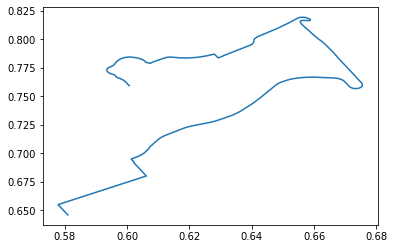

In [8]:
a = [[0.6007152184831729, 0.7593917812497059], [0.6004580612757321, 0.7598302694482998], [0.5995821195379251, 0.7625342800063187], [0.5989110999497596, 0.7639861631527758], [0.5979025615268618, 0.7654526625724823], [0.5969301858362538, 0.7663929761538899], [0.5966368658965233, 0.7667827434415828], [0.5964038171773042, 0.7673479060086164], [0.596174786539441, 0.7682443707702062], [0.5958091411351025, 0.7689849286167189], [0.5955921647413359, 0.7692187889892653], [0.5948327473631385, 0.7697108701899127], [0.5940894023103936, 0.7706755442268748], [0.5936634856855725, 0.7717230438123893], [0.593563033651444, 0.7721566599199], [0.5934786539427396, 0.7730433804992543], [0.5935791059768966, 0.7739495894430104], [0.5938041185334038, 0.7746268101053033], [0.5940974384731342, 0.7751773563990872], [0.5948890005022653, 0.7760543327962751], [0.5956243093922696, 0.7772187625680629], [0.5961225514816701, 0.7785439713460803], [0.5964078352586601, 0.7796889127534662], [0.5967533902561615, 0.7807412844301331], [0.5974726268206847, 0.782149318756703], [0.5980512305374052, 0.7829434696052691], [0.5986378704168661, 0.7835476089011065], [0.5995218483174137, 0.7841468761058609], [0.6003977900552493, 0.784414841116128], [0.6009924660974508, 0.7844343294804608], [0.6023706680060144, 0.7840543063750035], [0.6033872425916527, 0.7835524809921898], [0.6046207935710575, 0.7825537023176454], [0.60518734304371, 0.781837504926618], [0.60567754897037, 0.7809654006205132], [0.6059347061778109, 0.7799520056726502], [0.6068709191361006, 0.7793088896480088], [0.6071562029131191, 0.7790214362734089], [0.6074414866901091, 0.7788119363562783], [0.6077749874434853, 0.779508645382973], [0.608184831742854, 0.7799812382192185], [0.6120381717729678, 0.7836158181764096], [0.6126649924661031, 0.7840981551948906], [0.6132235057759864, 0.7843368876585894], [0.6142280261175281, 0.7843661202051578], [0.6169121044701045, 0.7837376204538352], [0.6187282772476144, 0.7835914577209936], [0.6204239075841301, 0.7837083879072669], [0.6214364640883838, 0.7838837831866767], [0.6224008036162798, 0.7841420040147776], [0.6240401808136687, 0.7847607595838646], [0.6256353591160275, 0.7855256778858624], [0.6276162732295332, 0.7867972936617571], [0.6278252134605592, 0.7868557587549629], [0.6280180813661327, 0.7867972936617571], [0.6281828227021571, 0.786597537926862], [0.6289824208940288, 0.7842881667476193], [0.6292797589151152, 0.7836401786318947], [0.6309874434957276, 0.7856523522543712], [0.6354957307885544, 0.7904854666210708], [0.6371069814163657, 0.7921712101400743], [0.6395981918633971, 0.7949044532446615], [0.6401687594173769, 0.7958398947349861], [0.6404339527875298, 0.7965317316705285], [0.6406187845303912, 0.7973843476123004], [0.6407272727272603, 0.7987387889368168], [0.640755399296838, 0.799401393325791], [0.6408920140632847, 0.8003173464517827], [0.6414384731290715, 0.801535369225624], [0.6416514314414821, 0.8018959039666793], [0.6422260170768466, 0.8026705664508434], [0.6443917629331852, 0.8051163561808308], [0.6479598191863376, 0.8091699359722138], [0.650848819688584, 0.8129214461157472], [0.6520301356102467, 0.8145194919950458], [0.6547664490205938, 0.8185681996954148], [0.6551441486690002, 0.8188995018899019], [0.6555981918633705, 0.819143106444684], [0.6563616273229524, 0.8193038854508443], [0.6573219487694639, 0.8190554088049791], [0.6584751381215489, 0.8179494441262586], [0.6587282772476052, 0.8175694210208706], [0.6588407835258587, 0.8171747816420944], [0.6588488196885993, 0.8169798979982826], [0.6587443495730863, 0.8165755144373402], [0.6585354093420317, 0.8163562703380433], [0.6582461074836857, 0.8162880610627403], [0.6576835760924178, 0.8164829447065521], [0.6563375188347593, 0.8165316656175223], [0.655983927674546, 0.8163319098825581], [0.6558071320944251, 0.816107793692178], [0.6556102461074956, 0.8155718636717127], [0.655582119537918, 0.8149774685580417], [0.6559357106981313, 0.8135207133205015], [0.6576514314414842, 0.8091309592434791], [0.6580371672526312, 0.8083855293058833], [0.6592466097438429, 0.8052771351869218], [0.6614686087393369, 0.8000542535325986], [0.6621476644902143, 0.7989336725806286], [0.6634414866901021, 0.7960104179233127], [0.6635781014565487, 0.7956206506356891], [0.6644259166248065, 0.7933356399119313], [0.6657759919638211, 0.7896474669526177], [0.6662260170768354, 0.7883368744479883], [0.6687011551983857, 0.7808094937054361], [0.6707825213460484, 0.7748460542046003], [0.6724379708689184, 0.7700665328398849], [0.6733581115017557, 0.7674209873750718], [0.6740331491712772, 0.7652382905642685], [0.6752908086388751, 0.761681664064616], [0.6754716223003521, 0.7609167457626183], [0.6755318935208349, 0.7601908041893551], [0.6754957307885452, 0.7595428160736999], [0.6753751883475511, 0.7588168745004368], [0.6751541938724285, 0.7582127352045993], [0.6748046207935712, 0.7575744912711104], [0.6741255650426936, 0.7569557357019542], [0.6732737317930798, 0.7567413636937403], [0.6724942240080453, 0.7570142007950907], [0.6718834756403911, 0.7576037238176787], [0.6713530889000568, 0.7585927583100566], [0.6708669010547529, 0.759947199634573], [0.6696494224008005, 0.7633625354925364], [0.6692315419387199, 0.7641323258856173], [0.6688417880462169, 0.7646585117239162], [0.6683556002009129, 0.7651749533800487], [0.6677488699146148, 0.7656329299430445], [0.6668287292817775, 0.7659983367751831], [0.6605042692114409, 0.7668217201703175], [0.6595158211953803, 0.7668948015367729], [0.6581094927172391, 0.7667194062572938], [0.6571531893520836, 0.7666414527997553], [0.6554495228528273, 0.7662468134210484], [0.6537579105976961, 0.7656426741252109], [0.6525002511300696, 0.7650336627382903], [0.6510135610246084, 0.7638984655130016], [0.6491411351079717, 0.7620957918077249], [0.6485022601707684, 0.7612334316837865], [0.6479075841285669, 0.7601956762804384], [0.6443877448518293, 0.7523710979811199], [0.642603716725253, 0.7484052158293726], [0.6409763937719606, 0.7450873217934191], [0.6398633852335499, 0.7429728342579187], [0.6369301858362733, 0.7378376502433005], [0.6357046710195804, 0.7359180463516812], [0.6343224510296323, 0.7341007563730857], [0.6332697137117044, 0.7329509428745474], [0.6309311903566008, 0.7306708042418729], [0.6283917629332118, 0.728410153973531], [0.6271742842792594, 0.7274990729386918], [0.620608739326963, 0.72394244643897], [0.6190095429432483, 0.7228169933959169], [0.6178844801607124, 0.7217500054460004], [0.612158714213962, 0.7156355311212398], [0.6111541938724202, 0.7143005781610561], [0.6105354093420255, 0.7132823111221098], [0.6100090406830758, 0.7122348115365953], [0.6095389251632244, 0.711084998038057], [0.6073812154696263, 0.7058523722014982], [0.6067785032646842, 0.7036063382064751], [0.6055328980411827, 0.7004053743567256], [0.6042872928176813, 0.6983298635500292], [0.6037167252636728, 0.6975503289747819], [0.6026318432948398, 0.6963469224741902], [0.6013058764439899, 0.6950606904249766], [0.6021657458563443, 0.6925807960574071], [0.6021778001004409, 0.691742796388954], [0.6024148669010446, 0.6910412152712452], [0.6026438975389363, 0.6903786108822711], [0.6029291813159263, 0.6895552274870674], [0.6036484178804495, 0.6874894608626066], [0.6041788046207838, 0.6859644963497635], [0.6061838272225111, 0.6801959404926703], [0.60345153189352, 0.6777696391271542], [0.6023144148668876, 0.6767854767258594], [0.6017599196383603, 0.676312883889614], [0.6009402310396801, 0.6755820702252677], [0.5983967855349064, 0.6733019315925931], [0.5966047212456183, 0.6717136298954609], [0.595893520843807, 0.671075385961972], [0.5934103465595162, 0.6688829449690024], [0.5915580110497166, 0.6672410502698167], [0.590858864892002, 0.6665979342451753], [0.588343545956806, 0.6643762607056374], [0.5864389753892643, 0.6627051334598835], [0.5858001004520325, 0.6621497150750163], [0.5832887995981925, 0.6599377857176447], [0.5828588648920152, 0.6595528905211042], [0.5806087393269721, 0.6575407168986969], [0.5778362631843353, 0.6551046713509451], [0.5809904570567631, 0.6460620702777162]]
x = [a[0] for a in a]
y = [a[1] for a in a]
plt.plot(x,y)

In [5]:
import folium

# Coordinates are 10 points on the great circle from Boston to
# San Francisco.
# Reference: http://williams.best.vwh.net/avform.htm#Intermediate
coordinates = [
    [42.3581, -71.0636],
    [42.82995815, -74.78991444],
    [43.17929819, -78.56603306],
    [43.40320216, -82.37774519],
    [43.49975489, -86.20965845],
    [41.4338549, -108.74485069],
    [40.67471747, -112.29609954],
    [39.8093434, -115.76190821],
    [38.84352776, -119.13665678],
    [37.7833, -122.4167]]

# Create the map and add the line
m = folium.Map(location=[41.9, -97.3], zoom_start=4)
my_PolyLine=folium.PolyLine(locations=coordinates,weight=5)
m.add_child(my_PolyLine)